# Examples for WIMpy_NREFT

This is an example file to go with the `WIMpy_NREFT` code, available [here](https://github.com/bradkav/WIMpy_NREFT). The main functions are in `DMUtils.py`, which is loaded like this:

In [1]:
import DMUtils as DMU

#We'll also import some useful libraries
import numpy as np
import matplotlib.pyplot as pl

from tqdm import tqdm

In [2]:
print DMU.Nevents_standard(2.0, 45.0, 54, 131-54, 50, 1e-46, eff=None)*35636

 No efficiency!
0.477956873954


### Loading nuclear form factors

We load the NREFT form factor coefficients for the nucleus we're interested in (say Iodine for now) as follows. The form factor coefficients (`FF_I` in this case) are required to calculate the recoil rate.

In [3]:
A_Xe = 131 #Nucleon number
Z_Xe = 54 #Atomic number

### Differential recoil rate

Before we calculate the differential recoil rate $\mathrm{d}R/\mathrm{d}E_R$, we have to specify the couplings. We do this by defining two vectors of couplings: 1 for the couplings to protons and 1 for the couplings to neutrons. Each vector should have 11 elements (one entry for each of the 11 NREFT operators - note that $\mathcal{O}_2$ is set to zero by default, but we keep 11 entries so that the numbering matches): 

In [4]:
#Initialise the empty vectors
cp = np.zeros(11)
cn = np.zeros(11)

Let's start with the standard spin-independent interaction (so we want to set the first element $\mathcal{O}_1$, noting that the numbers of arrays starts from zero in python):

In [5]:
cp[0] = 1e-9
cn[0] = 1e-9
print("Couplings to protons [GeV^{-2}]:", cp)
print("Couplings to neutrons [GeV^{-2}]:", cn)

('Couplings to protons [GeV^{-2}]:', array([  1.00000000e-09,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00]))
('Couplings to neutrons [GeV^{-2}]:', array([  1.00000000e-09,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00]))


**Note that the couplings in the NREFT are *dimensionful* and should have units of GeV$^{-2}$**.

Now let's calculate the differential spectrum for a DM particle of mass 100 GeV:

In [6]:
m_x = 100 #DM mass in GeV

E_list = np.linspace(0, 100, 100)
R_list_SI = DMU.dRdE_NREFT(E_list, A_Xe, m_x, cp, cn, "Xe131") 
R_list_SI_check = E_list*0.0
for i, E in enumerate(E_list):
    R_list_SI_check[i] = DMU.dRdE_NREFT_old(E, A_Xe, m_x, cp, cn, "Xe131") 

Now let's plot the result, which will be in units of keV$^{-1}$ kg$^{-1}$ day$^{-1}$:

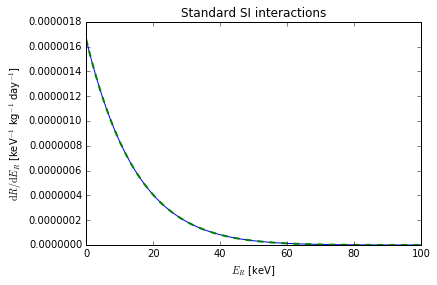

In [7]:
pl.figure()
pl.plot(E_list, R_list_SI)
pl.plot(E_list, R_list_SI_check, '--', lw=2.0)
pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
pl.title('Standard SI interactions')
pl.show()

Now let's try something more exotic. Let's just take some random values for all the couplings to protons and neutrons (setting the couplings to $\mathcal{O}_1$ to zero):

In [8]:
cp_random = np.random.randn(11)
cn_random = np.random.randn(11)
cp_random[0] = 0
cn_random[0] = 0
print("Couplings to protons [GeV^{-2}]:", cp_random)
print("Couplings to neutrons [GeV^{-2}]:", cn_random)

('Couplings to protons [GeV^{-2}]:', array([ 0.        ,  1.61620643, -1.09126136,  1.3175754 , -0.59145615,
       -0.2685184 , -0.48565318,  0.08920848, -0.51390856, -0.54367803,
        1.48377435]))
('Couplings to neutrons [GeV^{-2}]:', array([ 0.        ,  0.02833201,  1.71070641, -1.23652357, -0.17271721,
       -0.01866664, -1.79420746, -0.08033966, -0.30083849,  0.61821092,
        0.31442888]))


Then let's calculate and plot again:

In [9]:
E_list = np.linspace(0, 100, 100)

N_test = 1

#Calculating 1
for j in tqdm(range(N_test)):
    R_list_random_check = E_list*0.0
    for i, E in enumerate(E_list):
        R_list_random_check[i] = DMU.dRdE_NREFT_old(E, A_Xe, m_x, cp_random, cn_random, "Xe131") 

for j in tqdm(range(N_test)):
    R_list_random = DMU.dRdE_NREFT(E_list, A_Xe, m_x, cp_random, cn_random, "Xe131") 

100%|██████████| 1/1 [00:00<00:00, 189.32it/s]


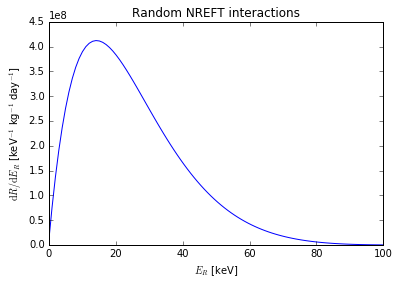

In [10]:
pl.figure()
#pl.plot(E_list, R_list_random_check,'--')
pl.plot(E_list, R_list_random)
pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
pl.title('Random NREFT interactions')
pl.show()

### Event Rates

You can also calculate the total number of events, using `Nevents_NREFT`. You have to specify a minimum and maximum energy, and you can also specify an efficiency function (i.e. the efficiency of the detector as a function of recoil energy) which multiplies the recoil rate:

In [16]:
Emin = 5 #keV
Emax = 50 #keV

#Just some made-up efficiency function
def efficiency(E_R):
    return 0.5/(1 + np.exp(-E_R))



In [15]:
print("Number of signal events per day per kg of target mass:")
print(DMU.Nevents_NREFT(Emin, Emax, A_I, m_x, cp_random, cn_random, FF_I, eff=efficiency))

Number of signal events per day per kg of target mass:
1.95125821474e-05
